<a href="https://colab.research.google.com/github/samiya-jabbar/Marks_Sheet_Grading_System_AI_ML_DL/blob/main/Marks_Sheet_Grading_System_AI_ML_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# **Preparing Data Set**

In [ ]:
df1 = pd.DataFrame(np.random.randint(20,32, size =(5000,5)),
                   columns= ['s1', 's2', 's3', 's4', 's5'])
df2 = pd.DataFrame(np.random.randint(33,39, size =(5000,5)),
                   columns= ['s1', 's2', 's3', 's4', 's5'])
df3 = pd.DataFrame(np.random.randint(40,49, size =(5000,5)),
                   columns= ['s1', 's2', 's3', 's4', 's5'])
df4 = pd.DataFrame(np.random.randint(50,59, size =(5000,5)),
                   columns= ['s1', 's2', 's3', 's4', 's5'])
df5 = pd.DataFrame(np.random.randint(60,69, size =(5000,5)),
                   columns= ['s1', 's2', 's3', 's4', 's5'])
df6 = pd.DataFrame(np.random.randint(70,79, size =(5000,5)),
                   columns= ['s1', 's2', 's3', 's4', 's5'])
df7 = pd.DataFrame(np.random.randint(80,100, size =(5000,5)),
                   columns= ['s1', 's2', 's3', 's4', 's5'])

df = pd.concat([df1,df2,df3,df4,df5,df6,df7])

del df1,df2,df3,df4,df5,df6,df7

df.head()

,s1,s2,s3,s4,s5
0,27,31,30,31,23
1,20,27,21,24,29
2,20,23,25,26,26
3,27,25,22,27,25
4,27,23,23,31,23


In [ ]:
df.shape

(35000, 5)

In [ ]:
df['obtained'] =  df.s1 + df.s2 + df.s3 + df.s4 + df.s5
df.head()

,s1,s2,s3,s4,s5,obtained
0,27,31,30,31,23,142
1,20,27,21,24,29,121
2,20,23,25,26,26,120
3,27,25,22,27,25,126
4,27,23,23,31,23,127


In [ ]:
df['obtained']= df.loc[:, 's1':'s5'].sum(axis=1)
df.head()

,s1,s2,s3,s4,s5,obtained
0,27,31,30,31,23,142
1,20,27,21,24,29,121
2,20,23,25,26,26,120
3,27,25,22,27,25,126
4,27,23,23,31,23,127


In [ ]:
df['percentage']= df.obtained/500*100
df.head()

,s1,s2,s3,s4,s5,obtained,percentage
0,27,31,30,31,23,142,28.4
1,20,27,21,24,29,121,24.2
2,20,23,25,26,26,120,24.0
3,27,25,22,27,25,126,25.2
4,27,23,23,31,23,127,25.4


# **Symbolic AI, Classical, Traditional, Rule based Programming**

In [ ]:
def grade(x):
  if x >= 80:
    return "A+"
  elif x >= 70:
    return "A"
  elif x >= 60:
    return "B"
  elif x >= 50:
    return "C"
  elif x >= 40:
    return "D"
  elif x >= 33:
    return "E"
  else:
    return "F"

df['Grade'] = df.percentage.apply(grade)
df.head()

,s1,s2,s3,s4,s5,obtained,percentage,Grade
0,27,31,30,31,23,142,28.4,F
1,20,27,21,24,29,121,24.2,F
2,20,23,25,26,26,120,24.0,F
3,27,25,22,27,25,126,25.2,F
4,27,23,23,31,23,127,25.4,F


In [ ]:
df.Grade.value_counts()

A     5000
D     5000
A+    5000
B     5000
E     5000
F     5000
C     5000
Name: Grade, dtype: int64

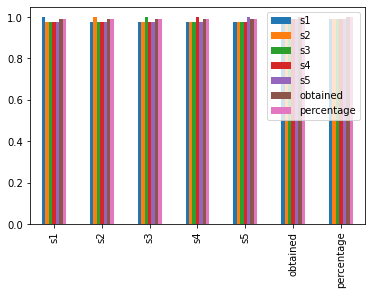

In [ ]:
df.corr().plot(kind='bar')

In [ ]:
dic = {
    'A+': 7,
    'A' : 6,
    'B' : 5,
    'C' : 4,
    'D' : 3,
    'E' : 2,
    'F' : 1
    }

In [ ]:
df['Grade1'] = df.Grade.map(dic)
df.head()

,s1,s2,s3,s4,s5,obtained,percentage,Grade,Grade1
0,27,31,30,31,23,142,28.4,F,1
1,20,27,21,24,29,121,24.2,F,1
2,20,23,25,26,26,120,24.0,F,1
3,27,25,22,27,25,126,25.2,F,1
4,27,23,23,31,23,127,25.4,F,1


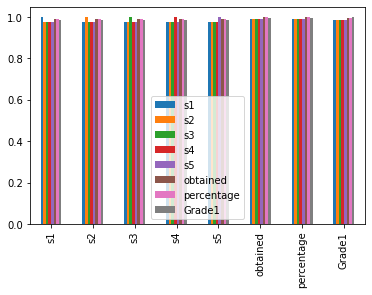

In [ ]:
df.corr().plot(kind='bar')

# **Find Grades(Rules) with Deep Learning- Neural Networks**

In [ ]:
df1 = df[['s1', 's2', 's3', 's4', 's5', 'Grade']]
df1.head(2)
df1 = df1.sample(frac=1)
df1.head(10)

,s1,s2,s3,s4,s5,Grade
1882,46,46,48,46,43,D
3300,30,31,23,31,28,F
403,21,25,26,31,25,F
1829,93,85,84,93,88,A+
4755,58,51,51,57,50,C
2176,25,25,21,27,30,F
1518,64,61,60,65,63,B
2493,68,64,61,68,66,B
4298,33,37,36,35,37,E
2609,26,28,22,29,30,F


In [ ]:
X = df1.loc[:, 's1':'s5']
X.head()

,s1,s2,s3,s4,s5
1882,46,46,48,46,43
3300,30,31,23,31,28
403,21,25,26,31,25
1829,93,85,84,93,88
4755,58,51,51,57,50


In [ ]:
Y = df1[['Grade']]
Y.head()

,Grade
1882,D
3300,F
403,F
1829,A+
4755,C


In [ ]:
Y = df1['Grade']
Y = pd.get_dummies(Y)
Y.head()

,A,A+,B,C,D,E,F
1882,0,0,0,0,1,0,0
3300,0,0,0,0,0,0,1
403,0,0,0,0,0,0,1
1829,0,1,0,0,0,0,0
4755,0,0,0,1,0,0,0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(5,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 32)                192       
_________________________________________________________________
dense_15 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_16 (Dense)             (None, 7)                 119       
Total params: 839
Trainable params: 839
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=SGD(learning_rate=0.002),
              loss= 'categorical_crossentropy',
              metrics=['acc'])

In [ ]:
model.fit(X,Y, epochs=20)

Epoch 1/20
1094/1094 [==============================] - 2s 1ms/step - loss: 1.9996 - acc: 0.1731
Epoch 2/20
1094/1094 [==============================] - 1s 1ms/step - loss: 1.7723 - acc: 0.2183
Epoch 3/20
1094/1094 [==============================] - 1s 1ms/step - loss: 1.6817 - acc: 0.2848
Epoch 4/20
1094/1094 [==============================] - 1s 1ms/step - loss: 1.6016 - acc: 0.3329
Epoch 5/20
1094/1094 [==============================] - 1s 1ms/step - loss: 1.5277 - acc: 0.3704
Epoch 6/20
1094/1094 [==============================] - 1s 1ms/step - loss: 1.4580 - acc: 0.4173
Epoch 7/20
1094/1094 [==============================] - 1s 1ms/step - loss: 1.3918 - acc: 0.4551
Epoch 8/20
1094/1094 [==============================] - 1s 1ms/step - loss: 1.3359 - acc: 0.4880
Epoch 9/20
1094/1094 [==============================] - 1s 1ms/step - loss: 1.2832 - acc: 0.5156
Epoch 10/20
1094/1094 [==============================] - 1s 1ms/step - loss: 1.2389 - acc: 0.5399
Epoch 11/20
1094/1094 [======

In [ ]:
df1 = pd.DataFrame(np.random.randint(20,100, size= (20, 5)), 
                    columns = ['s1', 's2', 's3', 's4', 's5'])

In [ ]:
np.argmax(model.predict([[90,98,95,97,95]]))

1

In [ ]:
Y.columns.take(np.argmax(model.predict([[90,98,95,97,95]]), axis= 1))


Index(['A+'], dtype='object')

In [ ]:
df1['predict']= Y.columns.take(np.argmax(model.predict(df1.loc[:, 's1': 's5']), axis= 1))
df1.head()

,s1,s2,s3,s4,s5,predict
0,75,22,90,44,38,F
1,54,93,99,91,73,F
2,84,25,29,85,95,F
3,36,47,53,22,68,F
4,31,42,98,85,95,A+


**Find Grades(Rules) with Machine Learning- Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
feature_cols = ['percentage']
X = df[feature_cols]
Y = df.Grade

In [ ]:
X.head()

,percentage
0,28.4
1,24.2
2,24.0
3,25.2
4,25.4


In [ ]:
Y.head()

0    F
1    F
2    F
3    F
4    F
Name: Grade, dtype: object

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state= 1)

In [ ]:
#Create Decision Tree Classifier Object
clf = DecisionTreeClassifier()

In [ ]:
#Train Decision Tree Classifier 
clf = clf.fit(X_train,Y_train)

In [ ]:
#predict the response for test data set
Y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:", metrics.accuracy_score(Y_test,Y_pred))

Accuracy: 1.0


In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

[Text(651.0, 498.3, 'X[0] <= 79.5\ngini = 0.857\nsamples = 24500\nvalue = [3520, 3543, 3516, 3469, 3505, 3494, 3453]\nclass = y[1]'),
 Text(558.0, 407.70000000000005, 'X[0] <= 69.0\ngini = 0.833\nsamples = 20957\nvalue = [3520, 0, 3516, 3469, 3505, 3494, 3453]\nclass = y[0]'),
 Text(465.0, 317.1, 'X[0] <= 59.0\ngini = 0.8\nsamples = 17437\nvalue = [0, 0, 3516, 3469, 3505, 3494, 3453]\nclass = y[2]'),
 Text(372.0, 226.5, 'X[0] <= 39.1\ngini = 0.75\nsamples = 13921\nvalue = [0, 0, 0, 3469, 3505, 3494, 3453]\nclass = y[4]'),
 Text(186.0, 135.89999999999998, 'X[0] <= 31.5\ngini = 0.5\nsamples = 6947\nvalue = [0, 0, 0, 0, 0, 3494, 3453]\nclass = y[5]'),
 Text(93.0, 45.299999999999955, 'gini = 0.0\nsamples = 3453\nvalue = [0, 0, 0, 0, 0, 0, 3453]\nclass = y[6]'),
 Text(279.0, 45.299999999999955, 'gini = 0.0\nsamples = 3494\nvalue = [0, 0, 0, 0, 0, 3494, 0]\nclass = y[5]'),
 Text(558.0, 135.89999999999998, 'X[0] <= 49.2\ngini = 0.5\nsamples = 6974\nvalue = [0, 0, 0, 3469, 3505, 0, 0]\nclass =

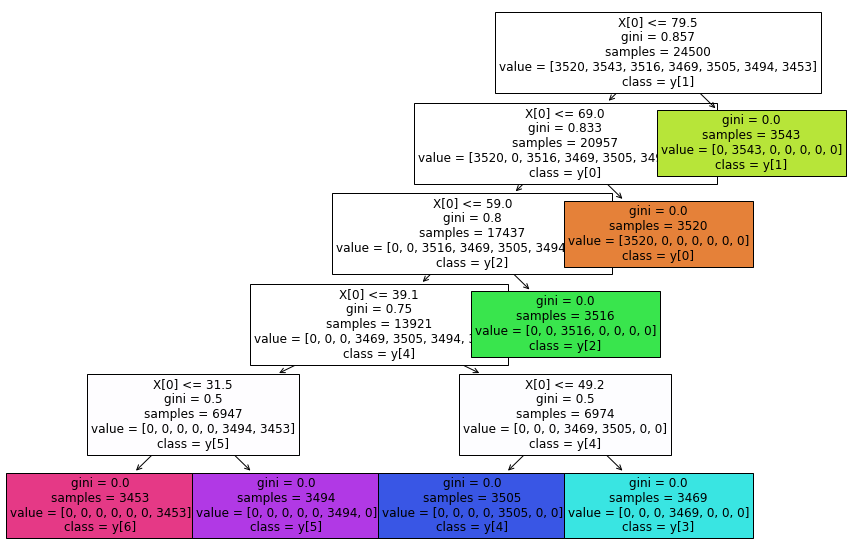

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=tree, class_names=True, fontsize= 12)